## **1. Data Ekplorasi**

In [20]:
import pandas as pd
df = pd.read_csv('PhabletSmartphoneSemarang2024.csv')
df.head()

,PERIOD - Code,PERIOD - Detail,SHOPNAME,PRODUCT,BRAND,MODEL,SALES,PRICE,CHANNELNAME,SHOPSIZE1,REGION,CITY
0,2403M,Maret 2024,17 PHONE,PHABLETS,APPLE,IPHONE 13 128/4GB SIM/ESIM NFC 5G,1,"10,000,000",Mobile Phone Specialists,LARGE,CENTRAL JAVA,"SEMARANG, KOTA"
1,2403M,Maret 2024,17 PHONE,PHABLETS,APPLE,IPHONE 15 PRO 256/8GB SIM/ESIM NFC 5G,1,"21,999,000",Mobile Phone Specialists,LARGE,CENTRAL JAVA,"SEMARANG, KOTA"
2,2403M,Maret 2024,17 PHONE,PHABLETS,INFINIX,HOT 30 128/8GB X6831 DUAL NFC LTE,3,"1,699,000",Mobile Phone Specialists,LARGE,CENTRAL JAVA,"SEMARANG, KOTA"
3,2403M,Maret 2024,17 PHONE,PHABLETS,INFINIX,HOT 30I 128/8GB X669D DUAL NFC LTE,3,"1,700,000",Mobile Phone Specialists,LARGE,CENTRAL JAVA,"SEMARANG, KOTA"
4,2403M,Maret 2024,17 PHONE,PHABLETS,INFINIX,NOTE 30 256/8GB X6833B DUAL NFC LTE,3,"2,450,000",Mobile Phone Specialists,LARGE,CENTRAL JAVA,"SEMARANG, KOTA"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14224 entries, 0 to 14223
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PERIOD - Code    14224 non-null  object
 1   PERIOD - Detail  14224 non-null  object
 2   SHOPNAME         14224 non-null  object
 3   PRODUCT          14224 non-null  object
 4   BRAND            14224 non-null  object
 5   MODEL            14224 non-null  object
 6   SALES            14224 non-null  int64 
 7   PRICE            14224 non-null  object
 8   CHANNELNAME      14224 non-null  object
 9   SHOPSIZE1        14224 non-null  object
 10  REGION           14224 non-null  object
 11  CITY             14224 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.3+ MB


In [22]:
df.describe()

,SALES
count,14224.000000
mean,7.008999
std,16.531381
min,1.000000
25%,2.000000
50%,3.000000
75%,8.000000
max,737.000000


In [23]:
df.duplicated().sum()

0

In [24]:
df.isnull().sum()

PERIOD - Code      0
PERIOD - Detail    0
SHOPNAME           0
PRODUCT            0
BRAND              0
MODEL              0
SALES              0
PRICE              0
CHANNELNAME        0
SHOPSIZE1          0
REGION             0
CITY               0
dtype: int64

## **2. Data Visualisasi**

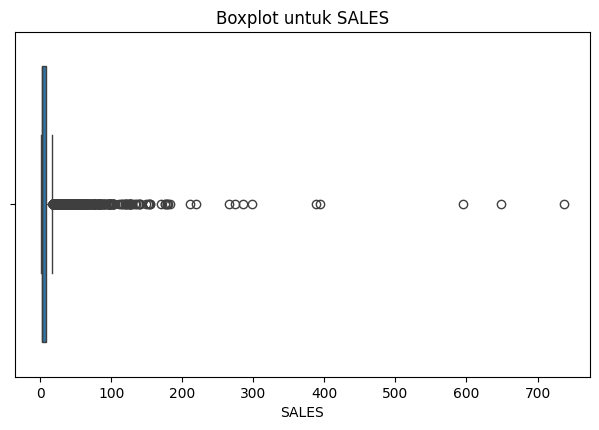

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['SALES']
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot untuk {col}")

plt.tight_layout()
plt.show()

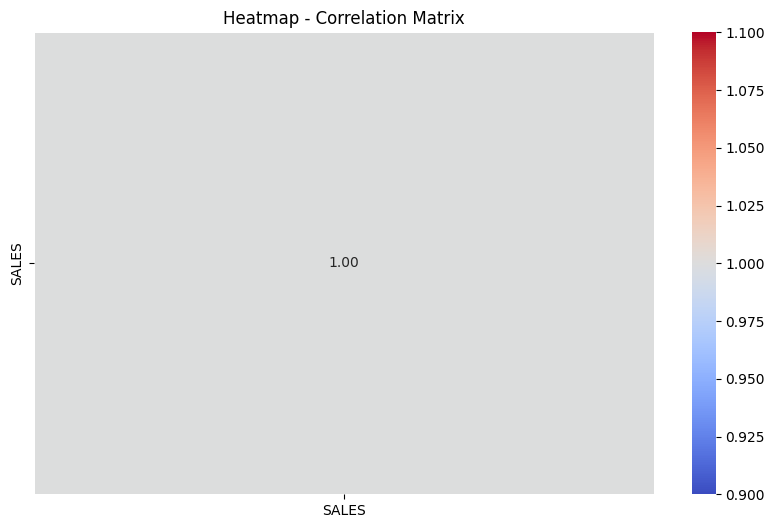

In [26]:
numeric_cols = df.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap - Correlation Matrix")
plt.show()

## **3. Data Preparation**

In [33]:
df['PRICE'] = pd.to_numeric(df['PRICE'].astype(str).str.replace(",", "").str.strip(), errors='coerce')
df = df.dropna(subset=['PRICE'])  # Drop baris yang gagal dikonversi

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode kolom kategorikal
le_brand = LabelEncoder()
le_shopsize = LabelEncoder()

df['BRAND_ENC'] = le_brand.fit_transform(df['BRAND'])
df['SHOPSIZE1_ENC'] = le_shopsize.fit_transform(df['SHOPSIZE1'])

# Fitur dan target
X = df[['PRICE', 'BRAND_ENC', 'SHOPSIZE1_ENC']]
y = df['SALES']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **4. Modeling Data**

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [37]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)


DecisionTreeRegressor()

## **5. Evaluation Data**

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prediksi
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Evaluasi Linear Regression
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

# Evaluasi Decision Tree
print("\nDecision Tree:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R2 Score:", r2_score(y_test, y_pred_dt))


Linear Regression:
MAE: 6.242406569002314
RMSE: 17.59733704316265
R2 Score: 0.009367777122173404

Decision Tree:
MAE: 5.168836832686415
RMSE: 16.61326090855675
R2 Score: 0.11706584467699499
